# 01 - PyCaret 基础教程

> 🎯 学习目标：掌握 PyCaret 的核心workflow，3行代码建立高性能baseline

---

## 📚 本节内容

1. PyCaret 简介与安装
2. 分类任务完整流程
3. 回归任务实战
4. 模型对比、调优、融合
5. 模型保存与部署
6. 实战案例：泰坦尼克生存预测

---

## 🚀 为什么选择 PyCaret？

**PyCaret vs 传统方法**：

```python
# 传统方法：50+ 行代码
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# ... 大量代码 ...

# PyCaret：3 行代码
from pycaret.classification import *
setup(data, target='target')
best = compare_models()
```

---

## 1. 安装与导入

In [16]:
# 安装 PyCaret（首次运行需要）
# !pip install pycaret

# 导入基础库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

print("✅ 基础库导入成功")

✅ 基础库导入成功


---

## 2. 分类任务：泰坦尼克生存预测

### 2.1 加载数据

In [2]:
# 使用 PyCaret 内置数据集
from pycaret.datasets import get_data

# 加载泰坦尼克数据集
data = get_data('titanic')

print(f"数据形状: {data.shape}")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据形状: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 数据概览
print("\n数据信息:")
print(data.info())

print("\n目标变量分布:")
print(data['Survived'].value_counts())


数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

目标变量分布:
0    549
1    342
Name: Survived, dtype: int64


### 2.2 初始化 PyCaret 环境（核心步骤）

`setup()` 会自动完成：
- 数据类型推断
- 训练集/测试集划分
- 缺失值处理
- 类别特征编码
- 数据标准化
- 特征工程

In [18]:
# ==================== 2.2 初始化 PyCaret 环境（最重要的一步）====================
#
# 📚 setup() 函数详解：
#
# 这是 PyCaret 的核心函数，会自动完成传统机器学习中需要手动完成的大量工作：
#
# 1. 数据类型推断 (Data Type Inference)
#    - 自动识别数值型、类别型、日期型特征
#    - 你可以手动修正推断错误的类型
#
# 2. 训练集/测试集划分 (Train-Test Split)
#    - 默认 70/30 分割，这里我们设置为 80/20
#    - 使用 session_id 保证可复现性
#
# 3. 缺失值处理 (Missing Values)
#    - 数值型：均值/中位数填充
#    - 类别型：众数填充或新增"missing"类别
#
# 4. 类别特征编码 (Categorical Encoding)
#    - One-Hot Encoding（独热编码）用于低基数特征
#    - Target Encoding 用于高基数特征
#
# 5. 数据标准化 (Normalization)
#    - 将数值特征缩放到相同范围（通常是 0-1 或均值0方差1）
#    - 对于距离敏感的模型（KNN、SVM）非常重要
#
# 6. 特征工程 (Feature Engineering)
#    - 可选：特征交互、多项式特征、分箱等
#    - 这里我们先关闭，后面会演示
#
# 💡 重要参数说明：
# - data: 原始数据集（DataFrame格式）
# - target: 目标变量列名（这里是 'Survived'）
# - session_id: 随机种子，保证结果可复现（建议设置）
# - train_size: 训练集比例（0.8 = 80%训练，20%测试）
# - normalize: 是否标准化数值特征（True=开启）
# - feature_selection: 是否自动特征选择（False=暂不开启）
# - verbose: 是否显示详细输出（False=简化输出）

from pycaret.classification import *

print("=" * 70)
print("🚀 初始化 PyCaret 环境")
print("=" * 70)

# 初始化环境
clf = setup(
    data=data,                    # 输入数据集
    target='Survived',            # 目标变量（1=生存，0=死亡）
    session_id=123,               # 随机种子（保证可复现）
    train_size=0.8,               # 80%训练，20%验证
    normalize=True,               # 标准化数值特征（重要！）
    feature_selection=False,      # 暂不进行特征选择
    verbose=False                 # 减少输出信息
)

print("\n✅ 环境初始化完成")
print("\n📊 PyCaret 已自动完成：")
print("   1. 数据类型推断和转换")
print("   2. 训练集/测试集划分 (80/20)")
print("   3. 缺失值填充")
print("   4. 类别特征编码（One-Hot等）")
print("   5. 数值特征标准化")
print("\n💡 现在可以直接训练模型，无需手动预处理！")

🚀 初始化 PyCaret 环境

✅ 环境初始化完成

📊 PyCaret 已自动完成：
   1. 数据类型推断和转换
   2. 训练集/测试集划分 (80/20)
   3. 缺失值填充
   4. 类别特征编码（One-Hot等）
   5. 数值特征标准化

💡 现在可以直接训练模型，无需手动预处理！


### 2.3 对比模型（自动训练15+模型）

这一步会自动：
- 训练15+个分类模型
- 10折交叉验证
- 计算多个评估指标
- 按准确率排序

In [5]:
# ==================== 2.3 对比模型（自动训练15+模型）====================
#
# 📚 compare_models() 函数详解：
#
# 这是 PyCaret 最强大的功能之一！它会：
# 1. 自动训练 15+ 个常用分类模型
# 2. 对每个模型进行 10 折交叉验证（确保结果可靠）
# 3. 计算多个评估指标（Accuracy、AUC、Recall、Precision、F1等）
# 4. 按指定指标排序，返回最佳模型
#
# 🤖 训练的模型包括：
# - 线性模型：Logistic Regression、Ridge Classifier
# - 距离模型：K-Nearest Neighbors (KNN)
# - 朴素贝叶斯：Naive Bayes
# - 树模型：Decision Tree、Random Forest
# - 提升模型：AdaBoost、Gradient Boosting、XGBoost、LightGBM
# - SVM：Support Vector Machine
# - 神经网络：Multi-Layer Perceptron
# - 等等...
#
# 💡 10折交叉验证是什么？
# - 将训练集分成10份
# - 轮流用9份训练、1份验证，重复10次
# - 计算10次结果的平均值，比单次训练更可靠
# - 可以有效避免过拟合，评估模型的真实泛化能力
#
# 📊 关键评估指标说明：
# - Accuracy（准确率）：预测正确的比例，适合类别平衡的数据
# - AUC（ROC曲线下面积）：综合评估模型在各阈值下的表现
# - Recall（召回率）：实际为正例中，被正确预测的比例（查全率）
# - Precision（精确率）：预测为正例中，实际为正例的比例（查准率）
# - F1 Score：Precision 和 Recall 的调和平均数
#
# 💡 重要参数：
# - n_select: 返回前N个最佳模型（这里返回1个）
# - sort: 按哪个指标排序（'Accuracy', 'AUC', 'F1'等）
# - fold: 交叉验证折数（默认10）
#
# ⏱️ 这一步会花费 1-3 分钟（取决于数据量和模型数量）

print("=" * 70)
print("🔍 开始对比训练多个模型")
print("=" * 70)
print("\n⏳ 正在训练15+个模型，每个模型进行10折交叉验证...")
print("   预计耗时: 1-3分钟\n")

# 对比所有模型（返回最佳模型）
best_model = compare_models(
    n_select=1,          # 返回最佳的1个模型
    sort='Accuracy'      # 按准确率排序（也可以选 'AUC', 'F1' 等）
)

print("\n" + "=" * 70)
print("✅ 模型对比完成")
print("=" * 70)
print(f"\n🏆 最佳模型: {type(best_model).__name__}")
print("\n💡 观察上表：")
print("   - 不同模型在泰坦尼克数据上的表现差异很大")
print("   - 最佳模型不一定在所有指标上都最优")
print("   - 注意 TT (Training Time)：有些模型训练很快，有些很慢")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7809,0.8163,0.5161,0.8561,0.6397,0.4975,0.5323,0.0110
et,Extra Trees Classifier,0.7431,0.7938,0.4623,0.7845,0.5700,0.4086,0.4431,0.0180
lr,Logistic Regression,0.7065,0.8281,0.3300,0.7839,0.4597,0.3033,0.3582,0.1840
svm,SVM - Linear Kernel,0.6716,0.0000,0.2570,0.7377,0.3381,0.2057,0.2569,0.0080
nb,Naive Bayes,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090
dt,Decision Tree Classifier,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090
ridge,Ridge Classifier,0.6166,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
ada,Ada Boost Classifier,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
gbc,Gradient Boosting Classifier,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
lda,Linear Discriminant Analysis,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090


### 2.4 查看最佳模型

In [6]:
# ==================== 2.4 查看最佳模型详情 ====================
#
# 📚 理解模型对象：
#
# PyCaret 返回的是标准的 sklearn 模型对象，可以：
# 1. 查看模型类型和名称
# 2. 查看模型的超参数设置
# 3. 访问模型的属性（如特征重要性、系数等）
# 4. 使用 sklearn 的所有方法（predict、predict_proba等）
#
# 💡 为什么要查看参数？
# - 了解模型使用的默认配置
# - 后续调优时知道哪些参数可以调整
# - 理解模型的工作原理
#
# 🎯 常见模型参数示例：
#
# KNN (K-Nearest Neighbors):
# - n_neighbors: 邻居数量（K值），决定参考多少个最近样本
# - weights: 权重方式（uniform=均等，distance=距离加权）
# - metric: 距离度量（euclidean=欧氏距离，manhattan=曼哈顿距离）
#
# Random Forest:
# - n_estimators: 树的数量
# - max_depth: 树的最大深度
# - min_samples_split: 分裂所需最小样本数
#
# XGBoost:
# - learning_rate: 学习率
# - max_depth: 树的最大深度
# - n_estimators: 提升轮数

print("=" * 70)
print("🔍 最佳模型详情")
print("=" * 70)

# 查看模型详情
print(f"\n📝 模型名称: {type(best_model).__name__}")
print(f"\n📋 完整模型对象:\n{best_model}")

# 查看模型参数
print("\n" + "=" * 70)
print("⚙️ 模型超参数配置")
print("=" * 70)
params = best_model.get_params()
for key, value in params.items():
    print(f"   {key}: {value}")

print("\n💡 这些参数决定了模型的行为特征")
print("   下一步我们将通过 tune_model() 自动优化这些参数")

最佳模型:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

模型参数:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


### 2.5 模型调优（超参数优化）

In [19]:
# ==================== 2.5 模型调优（超参数优化）====================
#
# 📚 tune_model() 函数详解：
#
# 什么是超参数？
# - 超参数是模型训练前需要设定的参数，不是通过训练学习得到的
# - 例如：KNN 的 n_neighbors（邻居数量）、决策树的 max_depth（最大深度）
# - 不同的超参数组合会导致模型性能差异很大
#
# tune_model() 做什么？
# 1. 自动尝试多组超参数组合（这里设置50组）
# 2. 使用随机搜索（Random Search）或网格搜索（Grid Search）
# 3. 对每组参数进行交叉验证评估
# 4. 返回性能最好的参数组合
#
# 💡 搜索策略：
# - Random Search（默认）：随机采样参数空间，适合参数多的情况
# - Grid Search：遍历所有参数组合，计算量大但更全面
#
# 📊 优化目标：
# - 可以选择任何指标作为优化目标（Accuracy、AUC、F1等）
# - 这里选择 Accuracy，也可以改为其他指标
#
# 💡 重要参数：
# - estimator: 要调优的模型（这里是 best_model）
# - n_iter: 尝试的参数组合数量（50组，越多越好但越慢）
# - optimize: 优化目标指标（'Accuracy', 'AUC', 'F1'等）
# - fold: 交叉验证折数（默认10）
#
# ⏱️ 耗时：取决于 n_iter 和模型复杂度，通常 1-5 分钟
#
# 🎯 预期效果：
# - 通常能提升 1-5% 的性能
# - 有时提升不明显，说明默认参数已经不错

print("=" * 70)
print("⚙️ 开始超参数调优")
print("=" * 70)
print(f"\n📝 当前模型: {type(best_model).__name__}")
print("   策略: 随机搜索 (Random Search)")
print("   尝试组合: 50 组超参数")
print("   优化目标: Accuracy")
print("\n⏳ 预计耗时: 1-3分钟...\n")

# 自动调优（使用随机搜索）
tuned_model = tune_model(
    best_model,              # 要调优的模型
    n_iter=50,               # 尝试50组超参数组合
    optimize='Accuracy'      # 以准确率为优化目标
)

print("\n" + "=" * 70)
print("✅ 超参数调优完成")
print("=" * 70)
print("\n💡 对比观察：")
print("   - 上表显示调优前后的性能对比")
print("   - 查看 Accuracy 列，调优后是否有提升？")
print("   - 有时提升不明显，说明默认参数已经很好")
print(f"\n🔧 优化后的参数:\n{tuned_model.get_params()}")

⚙️ 开始超参数调优

📝 当前模型: KNeighborsClassifier
   策略: 随机搜索 (Random Search)
   尝试组合: 50 组超参数
   优化目标: Accuracy

⏳ 预计耗时: 1-3分钟...



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7639,0.8543,0.5000,0.8235,0.6222,0.4650,0.4957
1,0.8056,0.8758,0.5714,0.8889,0.6957,0.5625,0.5922
2,0.7606,0.8455,0.4815,0.8125,0.6047,0.4486,0.4802
3,0.7887,0.8565,0.5185,0.8750,0.6512,0.5135,0.5497
4,0.8592,0.8969,0.7037,0.9048,0.7917,0.6878,0.7002
5,0.8310,0.8165,0.5926,0.9412,0.7273,0.6138,0.6483
6,0.7465,0.7753,0.5185,0.7368,0.6087,0.4295,0.4440
7,0.8310,0.8645,0.6667,0.8571,0.7500,0.6253,0.6366
8,0.8028,0.7588,0.5185,0.9333,0.6667,0.5424,0.5896


Fitting 10 folds for each of 50 candidates, totalling 500 fits

✅ 超参数调优完成

💡 对比观察：
   - 上表显示调优前后的性能对比
   - 查看 Accuracy 列，调优后是否有提升？
   - 有时提升不明显，说明默认参数已经很好

🔧 优化后的参数:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


### 2.6 可视化模型表现

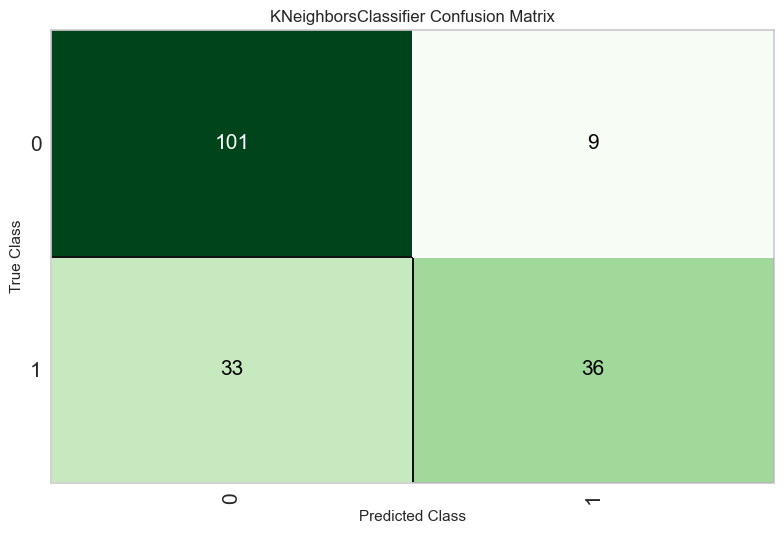

In [8]:
# ==================== 2.6 可视化模型表现 ====================
#
# 📚 plot_model() 函数详解：
#
# PyCaret 提供了丰富的可视化功能，帮助理解模型表现
# 只需要一行代码，就能生成专业的评估图表！
#
# 💡 常用的 plot 参数：
# - 'confusion_matrix': 混淆矩阵
# - 'auc': ROC曲线和AUC值
# - 'pr': Precision-Recall曲线
# - 'feature': 特征重要性（仅部分模型支持）
# - 'learning': 学习曲线
# - 'calibration': 模型校准曲线
# - 'boundary': 决策边界（仅2D数据）
#
# ==================== 混淆矩阵 (Confusion Matrix) ====================
#
# 📊 什么是混淆矩阵？
#
# 混淆矩阵是评估分类模型最基础、最重要的工具！
# 它展示了模型预测结果与真实标签的对应关系。
#
# 矩阵结构（2分类问题）：
#
#                    预测值
#              |  阴性(0)  |  阳性(1)  |
#    ----------|-----------|-----------|  
#    真  阴性  |    TN     |    FP     |  ← 实际未生存
#    实  (0)   | (真阴性)  | (假阳性)  |
#    值  ------|-----------|-----------|  
#       阳性   |    FN     |    TP     |  ← 实际生存
#       (1)    | (假阴性)  | (真阳性)  |
#    ----------|-----------|-----------|  
#
# 📖 四个象限含义：
#
# • TN (True Negative - 真阴性)：
#   实际是0，预测也是0 ✅ 预测正确！
#   例如：实际未生存，预测未生存
#
# • FP (False Positive - 假阳性，第一类错误)：
#   实际是0，预测是1 ❌ 预测错误！
#   例如：实际未生存，却预测生存
#   也叫"误报"，模型过于乐观
#
# • FN (False Negative - 假阴性，第二类错误)：
#   实际是1，预测是0 ❌ 预测错误！
#   例如：实际生存，却预测未生存
#   也叫"漏报"，模型过于保守
#
# • TP (True Positive - 真阳性)：
#   实际是1，预测也是1 ✅ 预测正确！
#   例如：实际生存，预测生存
#
# 🎯 如何解读混淆矩阵？
#
# 1. 主对角线（TN和TP）：预测正确的样本
#    → 越大越好，理想情况下其他格子都是0
#
# 2. 副对角线（FP和FN）：预测错误的样本  
#    → 越小越好
#
# 3. 不同业务场景的权衡：
#    • 医疗诊断：FN（漏诊）代价高，宁可误诊也不能漏诊
#    → 优先降低 FN，提高 Recall（召回率）
#    
#    • 垃圾邮件：FP（误报）代价高，不能把正常邮件误判为垃圾
#    → 优先降低 FP，提高 Precision（精确率）
#    
#    • 泰坦尼克预测：FN 和 FP 代价相当
#    → 平衡两者，关注 Accuracy 和 F1
#
# 📐 从混淆矩阵计算指标：
#
# • Accuracy（准确率）= (TP + TN) / (TP + TN + FP + FN)
#   → 所有预测正确的比例
#
# • Precision（精确率）= TP / (TP + FP)  
#   → 预测为正例中，实际为正例的比例
#   → 回答"模型说是的时候，有多少真的是？"
#
# • Recall（召回率）= TP / (TP + FN)
#   → 实际为正例中，被正确预测的比例  
#   → 回答"所有真实的正例中，模型找到了多少？"
#
# • F1 Score = 2 × (Precision × Recall) / (Precision + Recall)
#   → Precision 和 Recall 的调和平均数

print("=" * 70)
print("📊 可视化1: 混淆矩阵 (Confusion Matrix)")
print("=" * 70)
print("\n💡 观察要点：")
print("   1. 主对角线（左上+右下）：预测正确的数量，越大越好")
print("   2. 副对角线（右上+左下）：预测错误的数量，越小越好")
print("   3. 左上(TN): 实际未生存且预测未生存 ✅")
print("   4. 右下(TP): 实际生存且预测生存 ✅")
print("   5. 右上(FP): 实际未生存但预测生存 ❌ (误报)")
print("   6. 左下(FN): 实际生存但预测未生存 ❌ (漏报)\n")

# 绘制混淆矩阵
plot_model(tuned_model, plot='confusion_matrix')

print("\n📖 如何评价这个混淆矩阵？")
print("   - 如果对角线占大多数 → 模型表现良好")
print("   - 如果FP很多 → 模型过于乐观，容易误判为生存")
print("   - 如果FN很多 → 模型过于保守，容易漏掉真实生存者")

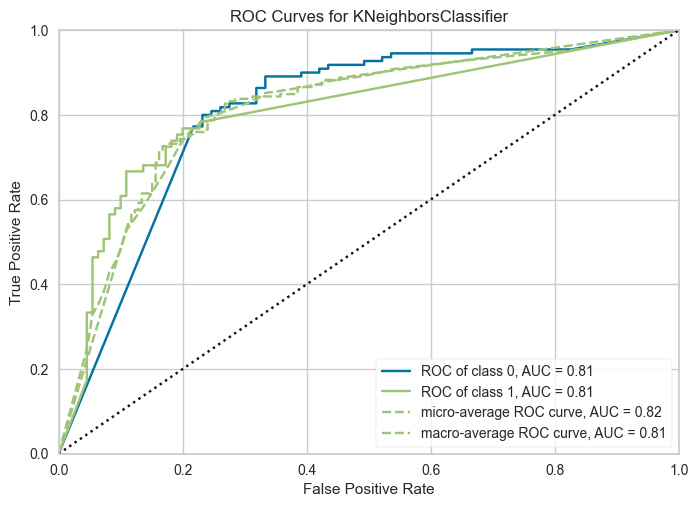

In [9]:
# ==================== ROC曲线和AUC ====================
#
# 📊 什么是ROC曲线？
#
# ROC = Receiver Operating Characteristic（接收者操作特征曲线）
# 它展示了在不同分类阈值下，模型的性能变化。
#
# 💡 为什么需要ROC曲线？
#
# 分类模型通常输出概率（如：生存概率0.7），然后设定阈值（如0.5）：
# - 概率 ≥ 0.5 → 预测为"生存"
# - 概率 < 0.5 → 预测为"未生存"
#
# 但阈值设为0.5不一定最优！
# - 阈值高（如0.8）→ 更保守，FP少但FN多（精确但漏报多）
# - 阈值低（如0.3）→ 更激进，FN少但FP多（召回高但误报多）
#
# ROC曲线展示所有可能阈值下的表现，帮助我们：
# 1. 评估模型整体的分类能力（不依赖具体阈值）
# 2. 根据业务需求选择最优阈值
#
# 📐 ROC曲线的坐标轴：
#
# • X轴 = FPR (False Positive Rate，假阳性率)
#   FPR = FP / (FP + TN)
#   → 在所有实际为"阴性"的样本中，被错误预测为"阳性"的比例
#   → 越低越好（误报率）
#
# • Y轴 = TPR (True Positive Rate，真阳性率)
#   TPR = TP / (TP + FN) = Recall（召回率）
#   → 在所有实际为"阳性"的样本中，被正确预测为"阳性"的比例
#   → 越高越好（检出率）
#
# 理想的模型：高TPR（找到所有正例）+ 低FPR（不误判负例）
#
# 📊 如何解读ROC曲线？
#
# 1. 对角线（虚线）：随机猜测的性能基线
#    - FPR=0.5, TPR=0.5 → 相当于抛硬币
#    - 模型应该在对角线上方，否则还不如随机猜
#
# 2. 曲线越靠近左上角越好：
#    - 左上角 = FPR=0, TPR=1（完美分类器）
#    - 说明在较低假阳性率下，就能获得较高真阳性率
#
# 3. 曲线下面积 = AUC (Area Under Curve)：
#    - AUC = 1.0：完美分类器
#    - AUC = 0.9-1.0：优秀
#    - AUC = 0.8-0.9：良好  
#    - AUC = 0.7-0.8：一般
#    - AUC = 0.5-0.7：较差
#    - AUC = 0.5：等同于随机猜测
#    - AUC < 0.5：比随机猜测还差（可能预测反了）
#
# 💡 AUC的物理意义：
#
# 随机抽取一个正样本和一个负样本，模型给正样本的评分
# 高于负样本的概率 = AUC
#
# 例如 AUC=0.85，表示有85%的概率，模型能正确区分随机抽取的
# 一对正负样本。
#
# 🎯 ROC vs 混淆矩阵：
#
# - 混淆矩阵：针对特定阈值（通常0.5）的性能
# - ROC曲线：所有阈值下的综合性能
# - 两者互补，都很重要！
#
# 💼 实际应用建议：
#
# • 样本不平衡时，ROC/AUC比Accuracy更可靠
# • 需要调整决策阈值时，ROC曲线能帮助找到最优点
# • 对比多个模型时，AUC是很好的单一指标

print("=" * 70)
print("📈 可视化2: ROC曲线 (Receiver Operating Characteristic)")
print("=" * 70)
print("\n💡 观察要点：")
print("   1. 实线（蓝色）：模型的ROC曲线，越靠近左上角越好")
print("   2. 虚线（对角线）：随机猜测的基线，模型应在其上方")
print("   3. AUC值（图中显示）：曲线下面积，越接近1.0越好")
print("   4. AUC ≥ 0.8 通常认为模型性能良好\n")

# 绘制ROC曲线
plot_model(tuned_model, plot='auc')

print("\n📖 如何评价这个ROC曲线？")
print("   - 曲线弯曲度大、贴近左上角 → 模型分类能力强")
print("   - AUC ≥ 0.85 → 优秀")
print("   - AUC = 0.7-0.85 → 良好")
print("   - AUC < 0.7 → 需要改进")
print("   - 曲线接近对角线 → 模型接近随机猜测")

当前模型: KNeighborsClassifier
❌ KNeighborsClassifier 不支持内置特征重要性可视化

使用替代方案：排列重要性 (Permutation Importance)


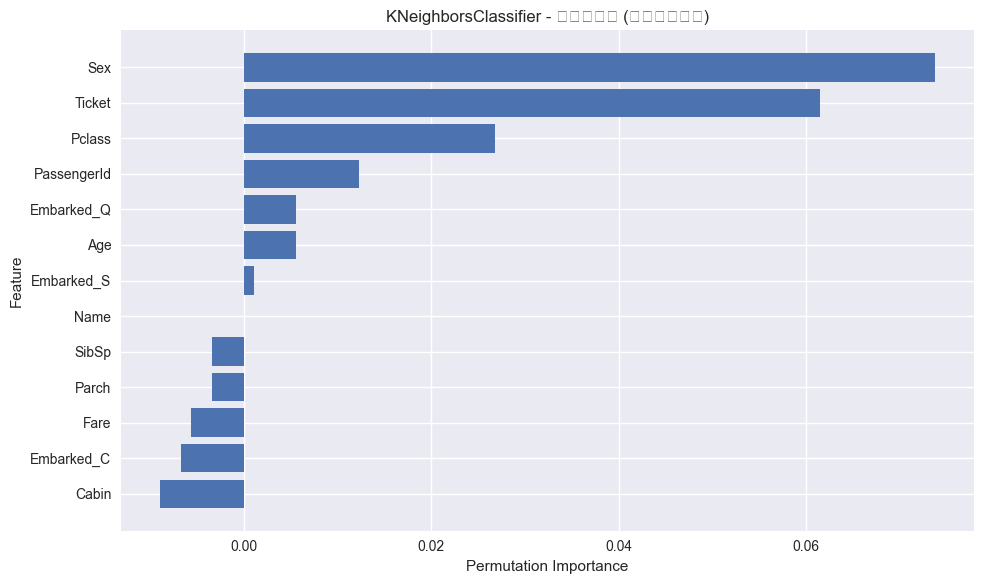


✅ 特征重要性可视化完成


In [13]:
# 智能特征重要性可视化
# 不是所有模型都支持feature plot，需要检查

model_name = str(type(tuned_model).__name__)
print(f"当前模型: {model_name}")

# 检查模型是否支持特征重要性
if hasattr(tuned_model, 'feature_importances_') or hasattr(tuned_model, 'coef_'):
    print("✅ 该模型支持特征重要性可视化")
    plot_model(tuned_model, plot='feature')
else:
    print(f"❌ {model_name} 不支持内置特征重要性可视化")
    print("\n使用替代方案：排列重要性 (Permutation Importance)")
    
    # 使用排列重要性作为替代
    from sklearn.inspection import permutation_importance
    import matplotlib.pyplot as plt
    
    # 获取预处理后的数据
    X_test = get_config('X_test_transformed')
    y_test = get_config('y_test')
    
    # 计算排列重要性
    perm_importance = permutation_importance(
        tuned_model, 
        X_test, 
        y_test,
        n_repeats=5,
        random_state=123
    )
    
    # 可视化前15个最重要的特征
    feature_names = X_test.columns
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False).head(15)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Permutation Importance')
    plt.ylabel('Feature')
    plt.title(f'{model_name} - 特征重要性 (排列重要性法)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\n✅ 特征重要性可视化完成")

### 2.7 模型融合（Ensemble）

### 📖 模型融合理论详解

#### 为什么融合能提升性能？

**直观理解**：
- 不同算法有不同的"视角"看待数据
- KNN关注局部相似性，决策树关注规则，SVM关注边界
- 融合就是"集思广益"，结合多个视角得到更稳健的预测

**数学原理**：
- 假设每个模型的错误率是ε，且错误是独立的
- 3个模型投票后的错误率 ≈ 3ε²(1-ε) + ε³ < ε（当ε<0.5时）
- 例如：3个准确率80%的模型融合后，准确率可达到89.6%

#### Blending vs Stacking 的区别

| 方法 | 原理 | 优点 | 缺点 |
|-----|------|------|------|
| **Blending** | 简单平均或投票 | 快速、稳定 | 未学习最优组合权重 |
| **Stacking** | 元模型学习组合 | 性能更优 | 计算量大、可能过拟合 |

**Blending**：就像班级投票选班长，每个同学（模型）投一票，票多者胜  
**Stacking**：先听每个同学的意见，然后班主任（元模型）综合判断

#### 何时使用融合？

- ✅ 模型差异大（如树模型 + 线性模型 + 距离模型）
- ✅ 单模型已调优，但还需提升1-2%
- ✅ Kaggle竞赛、生产环境高要求场景
- ❌ 时间/计算资源有限
- ❌ 模型可解释性要求高

In [17]:
# ==================== 2.7 模型融合（Ensemble）====================
#
# 📚 为什么要融合模型？
# - 单个模型可能在某些数据模式上表现好，但在其他模式上较弱
# - 融合多个模型可以"取长补短"，通常能提升1-3%的性能
# - 类似于"三个臭皮匠顶个诸葛亮"的思想
#
# 两种融合方法：
# 1. Voting/Blending: 简单投票或加权平均多个模型的预测
#    - 原理：对于分类问题，取多数投票；对于回归问题，取平均值
#    - 优点：简单快速，不容易过拟合
#    - 缺点：所有模型权重相同，无法学习最优组合
#
# 2. Stacking: 用元学习器（meta-learner）学习如何组合基模型的预测
#    - 原理：基模型的预测作为特征，训练一个新模型（元模型）
#    - 优点：能学习最优的模型组合权重，通常性能更好
#    - 缺点：计算量大，容易过拟合

print("=" * 70)
print("🔍 模型融合实验")
print("=" * 70)

# 获取前3个最佳模型
print("\n步骤1: 获取前3个最佳模型用于融合...")
top3 = compare_models(n_select=3, sort='Accuracy')

print(f"\n✅ 获取到的模型: {[type(m).__name__ for m in top3]}")

# 方法1: Voting融合（简单平均/投票）
print("\n" + "=" * 70)
print("📊 方法1: Voting/Blending 融合")
print("=" * 70)
blended = blend_models(top3)

# 方法2: Stacking融合（元学习器）
print("\n" + "=" * 70)
print("📊 方法2: Stacking 融合")
print("=" * 70)
stacked = stack_models(top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7809,0.8163,0.5161,0.8561,0.6397,0.4975,0.5323,0.0110
et,Extra Trees Classifier,0.7431,0.7938,0.4623,0.7845,0.5700,0.4086,0.4431,0.0190
lr,Logistic Regression,0.7065,0.8281,0.3300,0.7839,0.4597,0.3033,0.3582,0.1800
svm,SVM - Linear Kernel,0.6716,0.0000,0.2570,0.7377,0.3381,0.2057,0.2569,0.0080
nb,Naive Bayes,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
dt,Decision Tree Classifier,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
ridge,Ridge Classifier,0.6166,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
ada,Ada Boost Classifier,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
gbc,Gradient Boosting Classifier,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
lda,Linear Discriminant Analysis,0.6166,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8482,0.3929,0.7857,0.5238,0.3571,0.3999
1,0.7500,0.8912,0.3929,0.9167,0.5500,0.4130,0.4842
2,0.7042,0.7963,0.3333,0.7500,0.4615,0.2970,0.3435
3,0.7324,0.7862,0.3704,0.8333,0.5128,0.3640,0.4209
4,0.8028,0.9125,0.4815,1.0000,0.6500,0.5351,0.6044
5,0.8028,0.8173,0.4815,1.0000,0.6500,0.5351,0.6044
6,0.7324,0.7778,0.4815,0.7222,0.5778,0.3932,0.4105
7,0.7887,0.8662,0.5556,0.8333,0.6667,0.5209,0.5439
8,0.7746,0.8409,0.4444,0.9231,0.6000,0.4687,0.5294


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.8287,0.3214,0.8182,0.4615,0.3102,0.3739
1,0.7222,0.8831,0.3214,0.9000,0.4737,0.3382,0.4211
2,0.6901,0.8064,0.2963,0.7273,0.4211,0.2576,0.3060
3,0.6620,0.7719,0.1852,0.7143,0.2941,0.1631,0.2275
4,0.8028,0.9091,0.4815,1.0000,0.6500,0.5351,0.6044
5,0.7465,0.8207,0.3333,1.0000,0.5000,0.3826,0.4864
6,0.6761,0.7828,0.4074,0.6111,0.4889,0.2654,0.2771
7,0.7183,0.8847,0.3333,0.8182,0.4737,0.3251,0.3862
8,0.7606,0.8392,0.4074,0.9167,0.5641,0.4309,0.4983


In [24]:
# ==================== 2.7.1 融合模型性能对比 ====================
#
# 💡 核心问题：融合后的模型性能是否真的提升了？
#
# 对比以下模型的性能：
# 1. 原始最佳模型 (best_model) - 未调优的最佳模型
# 2. 调优后模型 (tuned_model) - 超参数优化后的模型
# 3. Blending融合 (blended) - Voting方法融合的模型
# 4. Stacking融合 (stacked) - 元学习器融合的模型
#
# 这样我们可以看到完整的性能提升路径：
# 基础模型 → 调优 → 融合
#
# ==================== 版本兼容性说明 ====================
#
# 📌 重要：PyCaret 版本差异处理
#
# PyCaret 在不同版本中，pull() 返回的 DataFrame 结构不同：
# - PyCaret 2.x: DataFrame 有 'Mean', 'SD', 'Min', 'Max' 等行索引
# - PyCaret 3.x: DataFrame 直接包含指标值，没有 'Mean' 索引
#
# 为了让代码同时兼容两个版本，我们需要编写健壮的指标提取函数。
# 这也是真实项目中常见的挑战：如何处理第三方库的版本变化。

print("=" * 70)
print("📊 模型性能对比实验")
print("=" * 70)

# 创建模型字典，方便后续使用
models_to_compare = {
    'Original Best': best_model,
    'Tuned': tuned_model,
    'Blended': blended,
    'Stacked': stacked
}

# ==================== 版本兼容的指标提取函数 ====================
def extract_metric_safe(metrics_df, metric_name):
    """
    从 PyCaret 的 metrics DataFrame 中安全提取指标值
    
    这个函数解决了 PyCaret 2.x 和 3.x 版本之间的兼容性问题
    
    参数:
        metrics_df: pull() 返回的 DataFrame
        metric_name: 指标名称（如 'Accuracy', 'AUC', 'Recall' 等）
    
    返回:
        float: 指标值
    
    兼容性处理逻辑:
        1. 首先检查是否有 'Mean' 索引（PyCaret 2.x 的特征）
        2. 如果有，使用 metrics_df.loc['Mean', metric_name] 获取
        3. 如果没有（PyCaret 3.x），则：
           - 如果是交叉验证结果（多行），取平均值
           - 如果只有一行，直接取该值
        4. 捕获任何异常，返回 0.0 并显示警告
    
    教学要点:
        - 这是「防御性编程」的典型例子
        - 不假设数据结构，而是先检查再使用
        - 优雅的错误处理，不让程序崩溃
    """
    try:
        # 检查是否是 PyCaret 2.x 的结构（有 'Mean' 行索引）
        if 'Mean' in metrics_df.index:
            return metrics_df.loc['Mean', metric_name]
        else:
            # PyCaret 3.x 的结构（没有 'Mean' 索引）
            # 如果是交叉验证结果（多行），取平均值；否则取第一个值
            if len(metrics_df) > 1:
                return metrics_df[metric_name].mean()
            else:
                return metrics_df[metric_name].iloc[0]
    except (KeyError, IndexError) as e:
        # 如果出现任何键值或索引错误，显示警告并返回 0.0
        print(f"⚠️ 警告: 无法提取指标 '{metric_name}': {e}")
        return 0.0

# 存储评估结果
results = []

# 逐个评估模型
for name, model in models_to_compare.items():
    print(f"\n{'='*70}")
    print(f"🔍 评估模型: {name}")
    print(f"   模型类型: {type(model).__name__}")
    print(f"{'='*70}")
    
    # 使用 PyCaret 的评估功能（会自动进行10折交叉验证）
    # 注意：这里不显示详细输出，只获取结果
    _ = predict_model(model, verbose=False)
    
    # 获取评估指标（pull() 会获取最近一次操作的结果）
    metrics = pull()
    
    # 【可选】调试：查看 metrics 的结构（帮助理解版本差异）
    # 如果你想了解你的 PyCaret 版本返回的是什么结构，可以取消下面两行的注释：
    # print(f"DEBUG - metrics DataFrame 前5行:\n{metrics.head()}")
    # print(f"DEBUG - metrics 的索引: {metrics.index.tolist()}")
    
    # 使用版本兼容函数提取关键指标
    # 注意：'Prec.' 是 Precision 的缩写（PyCaret 内部使用的列名）
    results.append({
        'Model': name,
        'Accuracy': round(extract_metric_safe(metrics, 'Accuracy'), 4),
        'AUC': round(extract_metric_safe(metrics, 'AUC'), 4),
        'Recall': round(extract_metric_safe(metrics, 'Recall'), 4),
        'Precision': round(extract_metric_safe(metrics, 'Prec.'), 4),
        'F1': round(extract_metric_safe(metrics, 'F1'), 4)
    })

# 创建对比表格
comparison_df = pd.DataFrame(results)

# 按准确率排序
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# 美化显示
print("\n" + "=" * 70)
print("📈 综合性能对比表（按 Accuracy 排序）")
print("=" * 70)
print(comparison_df.to_string(index=False))

# 找出最佳模型
best_performer = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print("\n" + "=" * 70)
print(f"🏆 最佳模型: {best_performer}")
print(f"🎯 准确率: {best_accuracy:.4f}")
print("=" * 70)

# 计算性能提升
original_acc = comparison_df[comparison_df['Model'] == 'Original Best']['Accuracy'].values[0]
best_acc = comparison_df.iloc[0]['Accuracy']
improvement = ((best_acc - original_acc) / original_acc) * 100

print(f"\n💡 相比原始模型，性能提升: {improvement:.2f}%")

# 保存最佳模型名称供后续使用
best_performer_name = best_performer
print(f"\n✅ 性能对比完成，将使用 '{best_performer}' 模型进行后续操作")

📊 模型性能对比实验

🔍 评估模型: Original Best
   模型类型: KNeighborsClassifier

🔍 评估模型: Tuned
   模型类型: KNeighborsClassifier

🔍 评估模型: Blended
   模型类型: VotingClassifier

🔍 评估模型: Stacked
   模型类型: StackingClassifier

📈 综合性能对比表（按 Accuracy 排序）
        Model  Accuracy    AUC  Recall  Precision     F1
        Tuned    0.7654 0.8089  0.5217     0.8000 0.6316
Original Best    0.7430 0.8009  0.4783     0.7674 0.5893
      Blended    0.7374 0.8307  0.4493     0.7750 0.5688
      Stacked    0.6927 0.7897  0.3333     0.7188 0.4554

🏆 最佳模型: Tuned
🎯 准确率: 0.7654

💡 相比原始模型，性能提升: 3.01%

✅ 性能对比完成，将使用 'Tuned' 模型进行后续操作


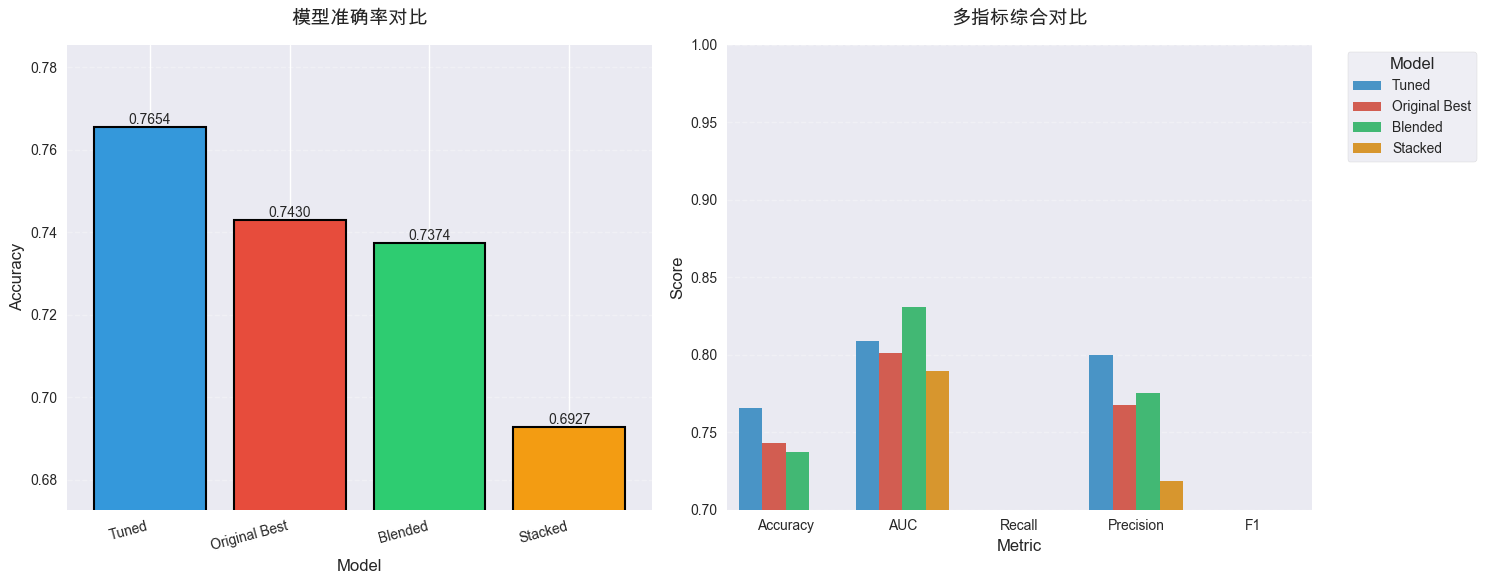


💡 可视化分析要点

1. 📊 左图 - Accuracy对比：
   - 最高: Tuned (0.7654)
   - 最低: Stacked (0.6927)
   - 性能提升: 10.50%

2. 📈 右图 - 多指标对比：
   - 观察不同模型在各指标上的表现是否一致
   - 某些模型可能在Recall高但Precision低（或反之）
   - 融合模型通常在多个指标上表现更均衡

3. 🎯 融合效果：
   - Blending相比Tuned提升: -3.66%
   - Stacking相比Tuned提升: -9.50%

✅ 可视化完成


In [25]:
# ==================== 2.7.2 可视化性能提升 ====================
#
# 💡 通过图表直观展示不同模型的性能差异
# 这有助于理解：
# 1. 调优是否有效？
# 2. 融合是否带来提升？
# 3. Blending vs Stacking 哪个更好？

import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建图表
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ========== 子图1: Accuracy对比柱状图 ==========
ax1 = axes[0]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']  # 蓝、红、绿、橙

bars = ax1.bar(
    comparison_df['Model'], 
    comparison_df['Accuracy'],
    color=colors[:len(comparison_df)],
    edgecolor='black',
    linewidth=1.5
)

# 在柱子上方显示数值
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2., 
        height,
        f'{height:.4f}',
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

ax1.set_title('模型准确率对比', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim([comparison_df['Accuracy'].min() - 0.02, comparison_df['Accuracy'].max() + 0.02])

# ========== 子图2: 多指标综合对比 ==========
ax2 = axes[1]

# 数据转换为长格式（便于分组柱状图）
metrics = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1']
comparison_df_melted = comparison_df.melt(
    id_vars='Model',
    value_vars=metrics,
    var_name='Metric',
    value_name='Score'
)

# 绘制分组柱状图
sns.barplot(
    data=comparison_df_melted,
    x='Metric',
    y='Score',
    hue='Model',
    ax=ax2,
    palette=colors[:len(comparison_df)]
)

ax2.set_title('多指标综合对比', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_xlabel('Metric', fontsize=12)
ax2.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim([0.7, 1.0])  # 通常模型得分在这个范围

plt.tight_layout()
plt.show()

# ========== 打印观察要点 ==========
print("\n" + "=" * 70)
print("💡 可视化分析要点")
print("=" * 70)
print("\n1. 📊 左图 - Accuracy对比：")
print(f"   - 最高: {comparison_df.iloc[0]['Model']} ({comparison_df.iloc[0]['Accuracy']:.4f})")
print(f"   - 最低: {comparison_df.iloc[-1]['Model']} ({comparison_df.iloc[-1]['Accuracy']:.4f})")
print(f"   - 性能提升: {((comparison_df.iloc[0]['Accuracy'] - comparison_df.iloc[-1]['Accuracy']) / comparison_df.iloc[-1]['Accuracy'] * 100):.2f}%")

print("\n2. 📈 右图 - 多指标对比：")
print("   - 观察不同模型在各指标上的表现是否一致")
print("   - 某些模型可能在Recall高但Precision低（或反之）")
print("   - 融合模型通常在多个指标上表现更均衡")

print("\n3. 🎯 融合效果：")
if 'Blended' in comparison_df['Model'].values or 'Stacked' in comparison_df['Model'].values:
    blended_row = comparison_df[comparison_df['Model'] == 'Blended']
    stacked_row = comparison_df[comparison_df['Model'] == 'Stacked']
    tuned_row = comparison_df[comparison_df['Model'] == 'Tuned']
    
    if not blended_row.empty and not tuned_row.empty:
        blend_improvement = ((blended_row['Accuracy'].values[0] - tuned_row['Accuracy'].values[0]) / tuned_row['Accuracy'].values[0] * 100)
        print(f"   - Blending相比Tuned提升: {blend_improvement:.2f}%")
    
    if not stacked_row.empty and not tuned_row.empty:
        stack_improvement = ((stacked_row['Accuracy'].values[0] - tuned_row['Accuracy'].values[0]) / tuned_row['Accuracy'].values[0] * 100)
        print(f"   - Stacking相比Tuned提升: {stack_improvement:.2f}%")

print("\n✅ 可视化完成")

### 2.8 在测试集上评估

In [26]:
# ==================== 2.8 在测试集上评估 ====================
#
# 💡 策略: 选择性能最好的模型进行预测
# 根据上面的对比结果，我们自动选择最佳模型

# 创建模型映射字典
model_mapping = {
    'Original Best': best_model,
    'Tuned': tuned_model,
    'Blended': blended,
    'Stacked': stacked
}

# 自动选择最佳模型（从上面的对比结果中）
best_final_model = model_mapping[best_performer_name]

print("=" * 70)
print("🏆 使用最佳模型进行测试集预测")
print("=" * 70)
print(f"\n选择的模型: {best_performer_name}")
print(f"模型类型: {type(best_final_model).__name__}")
print(f"准确率: {comparison_df[comparison_df['Model'] == best_performer_name]['Accuracy'].values[0]:.4f}")

# 在hold-out测试集上预测
print("\n正在预测...")
predictions = predict_model(best_final_model)

print("\n" + "=" * 70)
print("📊 测试集预测结果（前5条）")
print("=" * 70)
predictions.head()

🏆 使用最佳模型进行测试集预测

选择的模型: Tuned
模型类型: KNeighborsClassifier
准确率: 0.7654

正在预测...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7654,0.8089,0.5217,0.8000,0.6316,0.4704,0.4936



📊 测试集预测结果（前5条）


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
561,562,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.895800,NaN,S,0,0,1.0000
641,642,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.300003,B35,C,1,1,1.0000
400,401,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.925000,NaN,S,1,0,1.0000
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.550003,C22 C26,S,0,1,0.7520
875,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.225000,NaN,C,1,0,0.8032


### 2.9 最终化模型（在全量数据上重新训练）

In [27]:
# ==================== 2.9 最终化模型（在全量数据上重新训练）====================
#
# 💡 什么是"最终化"？
# - 之前的所有训练都只使用了80%的数据（另外20%用于验证）
# - 最终化会使用100%的数据重新训练模型
# - 这样可以充分利用所有数据，进一步提升模型性能
#
# ⚠️ 注意：最终化后的模型无法再评估（因为没有保留测试集）
# 所以我们在最终化之前已经完成了所有评估

print("=" * 70)
print("🔄 最终化模型 - 使用全量数据重新训练")
print("=" * 70)
print(f"\n选择的模型: {best_performer_name}")
print(f"训练数据: 100% (之前为80%)")

# 使用全量数据重新训练最佳模型
final_model = finalize_model(best_final_model)

print("\n✅ 最终模型训练完成")
print(f"   模型类型: {best_performer_name}")
print(f"   基础算法: {type(final_model).__name__}")
print(f"   训练样本: {len(data)} (全量数据)")

🔄 最终化模型 - 使用全量数据重新训练

选择的模型: Tuned
训练数据: 100% (之前为80%)

✅ 最终模型训练完成
   模型类型: Tuned
   基础算法: Pipeline
   训练样本: 891 (全量数据)


### 2.10 保存模型

In [28]:
# ==================== 2.10 保存模型 ====================
#
# 💡 保存模型的最佳实践：
# - 文件名应包含模型类型，方便后续识别
# - PyCaret会自动保存整个pipeline（包括预处理步骤）
# - 保存的.pkl文件可以直接用于生产环境

# 生成文件名（包含模型类型）
model_filename = f'titanic_{best_performer_name.lower().replace(" ", "_")}_model'

print("=" * 70)
print("💾 保存模型")
print("=" * 70)
print(f"\n文件名: {model_filename}.pkl")
print(f"模型类型: {best_performer_name}")

# 保存模型
save_model(final_model, model_filename)

print(f"\n✅ 模型已成功保存")
print(f"\n📦 保存内容：")
print(f"   - 完整的预处理pipeline（数据清洗、编码、标准化等）")
print(f"   - 训练好的模型参数")
print(f"   - 可直接用于predict_model()进行预测")
print(f"\n💡 加载方式: loaded_model = load_model('{model_filename}')")

💾 保存模型

文件名: titanic_tuned_model.pkl
模型类型: Tuned
Transformation Pipeline and Model Successfully Saved

✅ 模型已成功保存

📦 保存内容：
   - 完整的预处理pipeline（数据清洗、编码、标准化等）
   - 训练好的模型参数
   - 可直接用于predict_model()进行预测

💡 加载方式: loaded_model = load_model('titanic_tuned_model')


# ==================== 2.11 加载模型并预测 ====================
#
# 📚 模型部署流程：
#
# 1. 训练环境（开发阶段）：
#    - 训练模型
#    - 评估性能
#    - 保存模型文件 (.pkl)
#
# 2. 生产环境（部署阶段）：
#    - 加载保存的模型
#    - 对新数据进行预测
#    - 无需重新训练！
#
# 💡 load_model() 函数：
#
# - 参数：模型文件名（不含.pkl后缀）
# - 返回：完整的模型对象（包括预处理pipeline）
# - 加载后可以直接用于predict_model()
#
# 🎯 实际应用场景：
#
# 场景1：Web API服务
# ```python
# from pycaret.classification import load_model, predict_model
# 
# # 启动时加载模型（只加载一次）
# model = load_model('titanic_model')
# 
# # API接口：接收新乘客数据，返回生存预测
# def predict_survival(passenger_data):
#     prediction = predict_model(model, data=passenger_data)
#     return prediction['prediction_label'].values[0]
# ```
#
# 场景2：批量预测
# ```python
# model = load_model('titanic_model')
# new_passengers = pd.read_csv('new_data.csv')
# predictions = predict_model(model, data=new_passengers)
# predictions.to_csv('predictions.csv')
# ```
#
# 场景3：A/B测试
# ```python
# model_v1 = load_model('titanic_model_v1')
# model_v2 = load_model('titanic_model_v2')
# # 对比两个模型版本的预测结果
# ```
#
# ⚠️ 注意事项：
#
# 1. 新数据的列名和类型必须与训练数据一致
# 2. PyCaret会自动应用训练时的预处理步骤
# 3. 确保生产环境安装了相同版本的依赖库

print("=" * 70)
print("📂 加载保存的模型")
print("=" * 70)

# 加载保存的模型（注意：不需要.pkl后缀）
loaded_model = load_model('titanic_model')

print(f"\n✅ 模型加载成功")
print(f"   模型类型: {type(loaded_model).__name__}")
print(f"   文件来源: titanic_model.pkl")

print("\n💡 使用加载的模型进行预测：")
print("   predictions = predict_model(loaded_model, data=new_data)")

print("\n📦 加载的内容包括：")
print("   - 训练好的模型参数")
print("   - 完整的预处理pipeline")
print("   - 特征编码器")
print("   - 标准化器")

# 演示：对新数据预测（这里用原始数据的一小部分作为示例）
# new_predictions = predict_model(loaded_model, data=data.head(5))
# print("\n📊 预测示例：")
# print(new_predictions[['Name', 'Sex', 'Age', 'prediction_label', 'prediction_score']])

print("\n✅ 模型已就绪，可用于生产环境！")

In [30]:
# 加载保存的模型
loaded_model = load_model('titanic_tuned_model')

# 对新数据预测
# new_predictions = predict_model(loaded_model, data=new_data)

print("✅ 模型加载成功")

Transformation Pipeline and Model Successfully Loaded
✅ 模型加载成功


---

## 3. 回归任务示例

### 3.1 加载回归数据

In [33]:
# 加载波士顿房价数据
from pycaret.datasets import get_data
boston = get_data('boston')

print(f"数据形状: {boston.shape}")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


数据形状: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 3.2 回归任务完整流程

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0378,9.4958,2.9283,0.8884,0.1298,0.1000,0.0140
gbr,Gradient Boosting Regressor,2.1622,9.2807,2.9799,0.8832,0.1423,0.1114,0.0110
rf,Random Forest Regressor,2.2303,10.6267,3.1441,0.8673,0.1447,0.1129,0.0190
lightgbm,Light Gradient Boosting Machine,2.3724,11.7660,3.3284,0.8543,0.1491,0.1182,0.1010
xgboost,Extreme Gradient Boosting,2.4154,12.5225,3.4385,0.8452,0.1539,0.1196,0.0120
ada,AdaBoost Regressor,2.8434,15.6209,3.8232,0.8108,0.1791,0.1499,0.0070
knn,K Neighbors Regressor,2.9509,21.2168,4.4391,0.7576,0.1787,0.1342,0.0030
dt,Decision Tree Regressor,2.9315,19.6159,4.2539,0.7368,0.1909,0.1456,0.0020
br,Bayesian Ridge,3.2715,22.6275,4.6204,0.7318,0.2497,0.1652,0.0030
huber,Huber Regressor,3.0807,23.4630,4.6462,0.7307,0.2554,0.1539,0.0030


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6595,13.4674,3.6698,0.8493,0.1394,0.0988
1,1.9068,6.7518,2.5984,0.8542,0.1191,0.1022
2,2.5426,9.5300,3.0871,0.9048,0.1732,0.1542
3,3.0106,23.9678,4.8957,0.7637,0.2017,0.1597
4,2.5438,10.9426,3.3080,0.9072,0.1524,0.1308
5,2.2067,9.1330,3.0221,0.8301,0.1552,0.1207
6,1.6454,4.2093,2.0517,0.9376,0.0933,0.0788
7,3.0894,34.0583,5.8359,0.6875,0.2059,0.1324
8,2.0147,6.7065,2.5897,0.8801,0.1588,0.1282


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


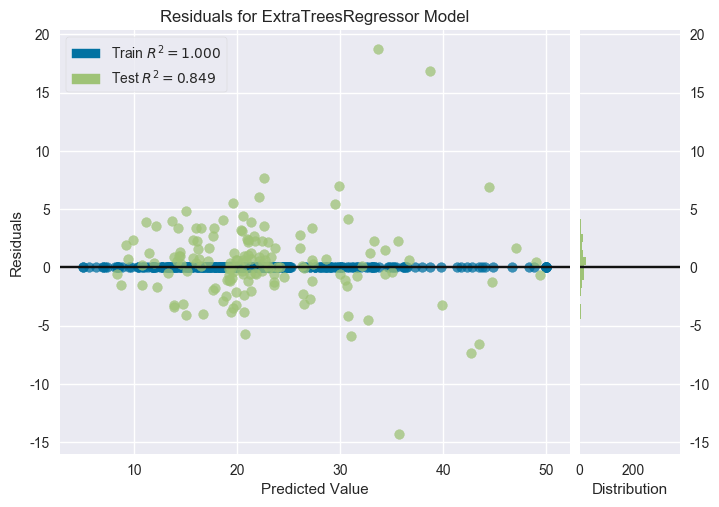

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.2456,12.1828,3.4904,0.8493,0.1511,0.1185


✅ 回归任务完成


In [34]:
from pycaret.regression import *

# 1. 初始化
reg = setup(
    data=boston,
    target='medv',
    session_id=123,
    normalize=True,
    verbose=False
)

# 2. 对比模型
best_reg = compare_models()

# 3. 调优
tuned_reg = tune_model(best_reg)

# 4. 可视化
plot_model(tuned_reg, plot='residuals')

# 5. 预测
predictions = predict_model(tuned_reg)

print("✅ 回归任务完成")

---

## 4. 高级功能

### 4.1 自定义指标

In [ ]:
# 添加自定义评估指标
from sklearn.metrics import make_scorer, f1_score

# 定义自定义指标
def custom_metric(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

# 在 setup 中使用
# clf = setup(..., custom_metric=make_scorer(custom_metric))

### 4.2 特征工程选项

In [ ]:
# 更多特征工程选项
clf_advanced = setup(
    data=data,
    target='Survived',
    
    # 数据预处理
    normalize=True,                  # 标准化
    transformation=True,             # 特征变换
    transform_target=False,          # 目标变量变换
    
    # 特征工程
    feature_selection=True,          # 特征选择
    feature_interaction=True,        # 特征交互
    polynomial_features=True,        # 多项式特征
    
    # 采样
    fix_imbalance=True,             # 处理类别不平衡
    
    # 其他
    remove_outliers=True,           # 移除异常值
    session_id=123,
    verbose=False
)

---

## 5. 总结与最佳实践

### PyCaret 核心流程

```python
# 步骤1: 初始化（自动特征工程）
setup(data, target='target')

# 步骤2: 对比模型（自动训练15+模型）
best = compare_models()

# 步骤3: 调优（自动超参数优化）
tuned = tune_model(best)

# 步骤4: 融合（提升性能）
blended = blend_models(top_models)

# 步骤5: 评估与可视化
plot_model(tuned, plot='confusion_matrix')

# 步骤6: 最终化与保存
final = finalize_model(tuned)
save_model(final, 'my_model')
```

### 最佳实践

1. **快速baseline**: 使用 `compare_models()` 快速找到最佳模型
2. **分析特征**: 使用 `plot_model(..., plot='feature')` 查看特征重要性
3. **理解选择**: 分析为什么某个模型最好，指导后续手动调优
4. **模型融合**: 融合多个模型通常能提升1-3%性能
5. **交叉验证**: PyCaret默认使用10折交叉验证，结果可靠

### 优势与局限

**优势**：
- ✅ 极易上手，代码简洁
- ✅ 自动特征工程
- ✅ 快速对比多个模型
- ✅ 丰富的可视化

**局限**：
- ❌ 对于特殊业务需求，灵活性不如手动
- ❌ 深度学习支持有限
- ❌ 大数据集性能一般

---

## 🎯 练习任务

1. **任务1**: 使用 PyCaret 完成 `iris` 数据集的分类
2. **任务2**: 对比 PyCaret 和手动训练的模型性能差异
3. **任务3**: 使用 PyCaret 完成 Kaggle 泰坦尼克竞赛
4. **任务4**: 分析 PyCaret 自动生成的特征工程逻辑

---

## 📚 参考资源

- [PyCaret 官方文档](https://pycaret.gitbook.io/docs/)
- [PyCaret GitHub](https://github.com/pycaret/pycaret)
- [PyCaret 教程](https://pycaret.org/tutorial/)

---

**下一节**: `02_autosklearn_intro.ipynb` - Auto-sklearn 使用指南